In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.4]])
mean_02=np.array([3,4.5])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])
dist_01=np.random.multivariate_normal(mean_01,cov_01,400)
dist_02=np.random.multivariate_normal(mean_02,cov_02,400)
print(dist_01.shape)
print(dist_02.shape)

(400, 2)
(400, 2)


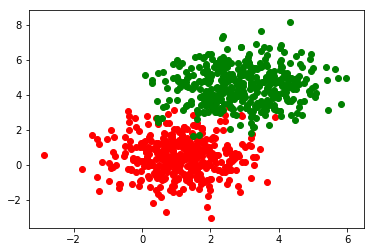

In [3]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.show()

In [4]:
data=np.zeros((800,3))
data[:400,:-1]=dist_01
data[400:,:-1]=dist_02
data[400:,-1]=1
print(data)

[[-0.06458496  0.98663794  0.        ]
 [ 2.4855408  -1.09364226  0.        ]
 [ 1.05483035  1.0766031   0.        ]
 ...
 [ 1.87089791  4.22478098  1.        ]
 [ 3.12589965  6.3391229   1.        ]
 [ 3.22744485  5.35069419  1.        ]]


In [5]:
np.random.shuffle(data)
print(data)

[[ 0.69487156  2.38225619  0.        ]
 [ 3.17802963  4.6287757   1.        ]
 [ 0.59569776  2.65764166  1.        ]
 ...
 [ 3.07429631  3.35504406  1.        ]
 [ 4.34169436  8.16303136  1.        ]
 [ 1.42007536 -0.27654656  0.        ]]


In [6]:
u=np.mean(data[:,:-1],axis=0)
std=np.std(data[:,:-1],axis=0)
data[:,:-1]=(data[:,:-1]-u)/std
print(data.shape)

(800, 3)


In [7]:
ones=np.ones((data.shape[0],1))
final_data=np.hstack((ones,data))
print(final_data)

[[ 1.         -0.9424952  -0.05231718  0.        ]
 [ 1.          0.81334796  0.92121712  1.        ]
 [ 1.         -1.01262108  0.06702173  1.        ]
 ...
 [ 1.          0.73999804  0.36924264  1.        ]
 [ 1.          1.63617627  2.45279479  1.        ]
 [ 1.         -0.42970299 -1.20451535  0.        ]]


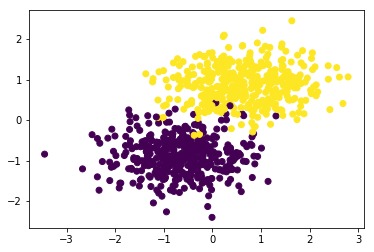

In [8]:
plt.scatter(final_data[:,1],final_data[:,2],c=final_data[:,3])
plt.show()

In [9]:
spilt=int(0.8*final_data.shape[0])
x_train=final_data[:spilt,:-1]
x_test=final_data[spilt:,:-1]
y_train=final_data[:spilt,-1]
y_test=final_data[spilt:,-1]

In [10]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

((640, 3), (160, 3))
((640,), (160,))


In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def hypothesis(x,theta):
    return sigmoid(np.dot(x,theta))

def error(x,y,theta):
    m=x.shape[0]
    err=0
    for i in range(m):
        hx=hypothesis(x[i],theta)
        err+=(y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx))
    return err/m
        

In [12]:
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        #for j in range(X.shape[1]):
        grad += (Y[i] - y_hat)*x
        
        
    return grad/m #Average Gradient


In [13]:
def grad_descent(X,Y,learning_rate=0.5):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(500):
        grad=get_grad(Y,X,theta)
        #for j in range(X.shape[1]):
            #theta[j] = theta[j] + learning_rate*grad[j]
        theta = theta + learning_rate*get_grad(Y,X,theta)    
        e = error(X,Y,theta)
        error_list.append(e)
        
    return theta,error_list
        


In [14]:
theta,error_list=grad_descent(x_train,y_train)

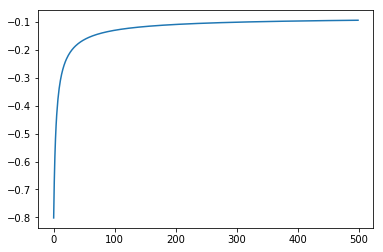

In [15]:
plt.plot(error_list)

In [16]:
print(theta)

[[-0.22531064]
 [ 1.34930062]
 [ 5.43144038]]


In [17]:
def predict(xtest,theta):
    prob=hypothesis(xtest,theta)
    if prob>=0.5:
        return 1
    else:
        return 0
        

In [18]:
Y_pred=np.array([predict(x_test[i],theta) for i in range(x_test.shape[0])])

In [19]:
y_test=np.array(y_test)
np.sum((Y_pred==y_test))*100/y_test.shape[0]

97

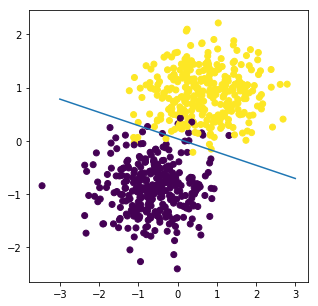

In [20]:
def drawline():
    plt.figure(figsize=(5,5))
    x=np.linspace(-3,3,10)
    y=-(theta[0,0]+theta[1,0]*x)/(theta[2,0])
    plt.scatter(x_train[:,1],x_train[:,2],c=y_train)
    plt.plot(x,y) 
drawline()    